learn from https://www.tensorflow.org/tutorials/images/transfer_learning

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import tensorflow as tf
from tensorflow import keras
import keras.layers as tfl
import seaborn as sn
import dataset

Get English data

In [2]:
# get English data
# interfacce function to get splited dataset
# resize all audio to (19, 1841) matrix
# 1841 is the max size of Japanese audio
dataset_collection = dataset.getMFCCDatasetRAVDESS(train_size = 0.6, valid_size = 0.2, test_size = 0.2, cut = False, emotion_number = 3, max_wid = 32, max_len = 1841)

eng_X_train = dataset_collection['X_train']
eng_Y_train = dataset_collection['Y_train']
eng_X_valid = dataset_collection['X_valid']
eng_Y_valid = dataset_collection['Y_valid']
eng_X_test = dataset_collection['X_test']
eng_Y_test = dataset_collection['Y_test']

eng_X_train_norm = dataset_collection['X_train_norm']
eng_X_valid_norm = dataset_collection['X_valid_norm']
eng_X_test_norm = dataset_collection['X_test_norm']

# convert array to tensor
eng_X_train_norm = tf.convert_to_tensor(eng_X_train_norm)
eng_X_valid_norm = tf.convert_to_tensor(eng_X_valid_norm)
eng_X_test_norm = tf.convert_to_tensor(eng_X_test_norm)
eng_Y_train = tf.convert_to_tensor(eng_Y_train)
eng_Y_valid = tf.convert_to_tensor(eng_Y_valid)
eng_Y_test = tf.convert_to_tensor(eng_Y_test)

eng_X_train = tf.convert_to_tensor(eng_X_train)
eng_X_valid = tf.convert_to_tensor(eng_X_valid)
eng_X_test = tf.convert_to_tensor(eng_X_test)

f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:49: RuntimeWarning: invalid value encountered in true_divide
  X_train_norm = (X_train - X_train_miu)/X_train_std
f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:50: RuntimeWarning: invalid value encountered in true_divide
  X_valid_norm = (X_valid - X_valid_miu)/X_valid_std
f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:51: RuntimeWarning: invalid value encountered in true_divide
  X_test_norm = (X_test - X_test_miu)/X_test_std


Get Japanese data

In [81]:
# get Japanese data
# interfacce function to get splited dataset
# resize all audio to (19, 1841) matrix
# 1841 is the max size of Japanese audio
dataset_collection = dataset.getMFCCDataset(train_size = 0.6, valid_size = 0.2, test_size = 0.2, cut = False, max_wid = 32, max_len = 1841)

jap_X_train = dataset_collection['X_train']
jap_Y_train = dataset_collection['Y_train']
jap_X_valid = dataset_collection['X_valid']
jap_Y_valid = dataset_collection['Y_valid']
jap_X_test = dataset_collection['X_test']
jap_Y_test = dataset_collection['Y_test']

jap_X_train_norm = dataset_collection['X_train_norm']
jap_X_valid_norm = dataset_collection['X_valid_norm']
jap_X_test_norm = dataset_collection['X_test_norm']

# convert array to tensor
# jap_X_train_norm = tf.convert_to_tensor(jap_X_train_norm)
# jap_X_valid_norm = tf.convert_to_tensor(jap_X_valid_norm)
# jap_X_test_norm = tf.convert_to_tensor(jap_X_test_norm)
# jap_Y_train = tf.convert_to_tensor(jap_Y_train)
# jap_Y_valid = tf.convert_to_tensor(jap_Y_valid)
# jap_Y_test = tf.convert_to_tensor(jap_Y_test)

# jap_X_train = tf.convert_to_tensor(jap_X_train)
# jap_X_valid = tf.convert_to_tensor(jap_X_valid)
# jap_X_test = tf.convert_to_tensor(jap_X_test)

f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:49: RuntimeWarning: invalid value encountered in true_divide
  X_train_norm = (X_train - X_train_miu)/X_train_std
f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:50: RuntimeWarning: invalid value encountered in true_divide
  X_valid_norm = (X_valid - X_valid_miu)/X_valid_std
f:\Shitford\Lectures\22fall\CS230\cs230\dataset.py:51: RuntimeWarning: invalid value encountered in true_divide
  X_test_norm = (X_test - X_test_miu)/X_test_std


In [21]:
# input pic size is same as spec matrix size (19, 1841)
input_shape = (jap_X_train_norm.shape[1], jap_X_train_norm.shape[2], 3)

In [22]:
base_model = tf.keras.applications.MobileNetV2(input_shape=input_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 1841, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 16, 921, 32)  864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 16, 921, 32)  128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 16, 921, 32)  0           ['bn_Conv1[0][

In [23]:
print(jap_X_train_norm.shape)

(540, 32, 1841)


In [ ]:
feature_batch = []
for i in range(len(jap_X_train_norm)):
    temp_feature_batch = np.resize(jap_X_train_norm[i], (1, 32, 1841, 3))
    ith_feature_batch = base_model(temp_feature_batch)
    feature_batch.append(ith_feature_batch)


In [96]:
X_train_norm_list = []
for i in range(len(jap_X_train_norm)):
    temp_feature_batch = np.resize(jap_X_train_norm[i], (32, 1841, 3))
    X_train_norm_list.append(temp_feature_batch)

X_valid_norm_list = []
for i in range(len(jap_X_valid_norm)):
    temp_feature_batch = np.resize(jap_X_valid_norm[i], (32, 1841, 3))
    X_valid_norm_list.append(temp_feature_batch)

Y_train_list = list(jap_Y_train)
Y_valid_list = list(jap_Y_valid)

# train_batch = next(iter(X_train_norm_list))
# feature_batch = base_model(train_batch)
# print(type(X_train_norm_list))
# print(feature_batch.shape)

In [54]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = []
for i in range(len(feature_batch)):
    ith_feature_batch_average = global_average_layer(feature_batch[i])
    feature_batch_average.append(ith_feature_batch_average)
print(np.array(feature_batch_average).shape)

(540, 1, 1280)


In [36]:
base_model.trainable = False

In [58]:
prediction_layer = tf.keras.layers.Dense(3)
# prediction_batch = prediction_layer(feature_batch_average)

In [59]:
inputs = tf.keras.Input(shape=input_shape)
x = base_model(inputs, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [103]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=[tf.keras.metrics.Accuracy()])

In [ ]:
model.summary()

In [79]:
# convert array to tensor
jap_X_train_norm = tf.convert_to_tensor(jap_X_train_norm)
jap_X_valid_norm = tf.convert_to_tensor(jap_X_valid_norm)
jap_X_test_norm = tf.convert_to_tensor(jap_X_test_norm)
jap_Y_train = tf.convert_to_tensor(jap_Y_train)
jap_Y_valid = tf.convert_to_tensor(jap_Y_valid)
jap_Y_test = tf.convert_to_tensor(jap_Y_test)

jap_X_train = tf.convert_to_tensor(jap_X_train)
jap_X_valid = tf.convert_to_tensor(jap_X_valid)
jap_X_test = tf.convert_to_tensor(jap_X_test)

In [107]:
X_train_norm = tf.convert_to_tensor(np.array(X_train_norm_list))
X_valid_norm = tf.convert_to_tensor(np.array(X_valid_norm_list))
Y_train = tf.convert_to_tensor(jap_Y_train)
Y_valid = tf.convert_to_tensor(jap_Y_valid)


In [106]:
print(Y_train)

tf.Tensor(
[[1 0 0]
 [0 0 1]
 [1 0 0]
 ...
 [0 0 1]
 [0 1 0]
 [1 0 0]], shape=(540, 3), dtype=int32)


In [108]:
# history = model.fit(X_train_norm_list,
#                     Y_train_list,
#                     epochs=10,
#                     validation_data=(X_valid_norm_list, Y_valid_list))

history = model.fit(X_train_norm,
                    Y_train,
                    epochs=10,
                    validation_data=(X_valid_norm, Y_valid))

Epoch 1/10
17/17 [==============================] - 57s 3s/step - loss: 5.8240 - accuracy: 0.3074 - val_loss: 5.0587 - val_accuracy: 0.3278
Epoch 2/10
17/17 [==============================] - 42s 3s/step - loss: 5.5398 - accuracy: 0.2963 - val_loss: 3.7202 - val_accuracy: 0.3333
Epoch 3/10
17/17 [==============================] - 42s 3s/step - loss: 4.9412 - accuracy: 0.3426 - val_loss: 1.8760 - val_accuracy: 0.3333
Epoch 4/10
17/17 [==============================] - 39s 2s/step - loss: 4.0167 - accuracy: 0.3722 - val_loss: 1.3825 - val_accuracy: 0.3333
Epoch 5/10
17/17 [==============================] - 33s 2s/step - loss: 3.8504 - accuracy: 0.3593 - val_loss: 1.2983 - val_accuracy: 0.3444
Epoch 6/10
17/17 [==============================] - 30s 2s/step - loss: 2.5839 - accuracy: 0.4037 - val_loss: 1.0133 - val_accuracy: 0.3944
Epoch 7/10
17/17 [==============================] - 26s 2s/step - loss: 2.7771 - accuracy: 0.4074 - val_loss: 1.0056 - val_accuracy: 0.4333
Epoch 8/10
17/17 [==

E:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

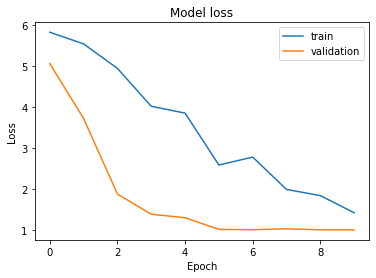

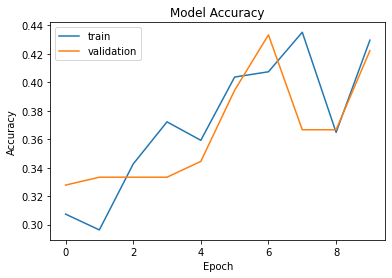

In [109]:
df_loss_acc = pd.DataFrame(history.history)
df_loss= df_loss_acc[['loss','val_loss']]
df_loss.rename(columns={'loss':'train','val_loss':'validation'},inplace=True)
df_acc= df_loss_acc[['accuracy','val_accuracy']]
df_acc.rename(columns={'accuracy':'train','val_accuracy':'validation'},inplace=True)
df_loss.plot(title='Model loss',figsize=(6,4)).set(xlabel='Epoch',ylabel='Loss')
df_acc.plot(title='Model Accuracy',figsize=(6,4)).set(xlabel='Epoch',ylabel='Accuracy')